<a href="https://colab.research.google.com/github/hamzabinashraf/Data-Analysis-Projets/blob/main/Netflix_eda_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://logos-download.com/wp-content/uploads/2016/03/Netflix_logo.png)

 # 📽‍️ Netflix EDA for beginners 📺

> Netflix is a streaming service that offers a wide variety of award-winning TV shows, movies, anime, documentaries, and more on thousands of internet-connected devices. You can watch as much as you want, whenever you want without a single commercial – all for one low monthly price.

----------------------------------------

# **1. Introduction**

**Libraries** 📚⬇

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# !pip install spacy
import spacy
# !pip install wordcloud
from wordcloud import WordCloud

# Read the .csv files 📁 and create a copy of the dataframe 📃

> 📌 Note:
> - The [**file.csv**](https://it.wikipedia.org/wiki/Comma-separated_values) contains all the information we need to analyze a bit of everything we know about Netflix and the products within it. It contains 29 unique columns and 15480 rows
> - I create a **copy of the [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)** so that I can use and modify it without touching the original file which could always serve as a backup  

In [ ]:
data = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')
df = data.copy()
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


<Axes: xlabel='Genre', ylabel='count'>

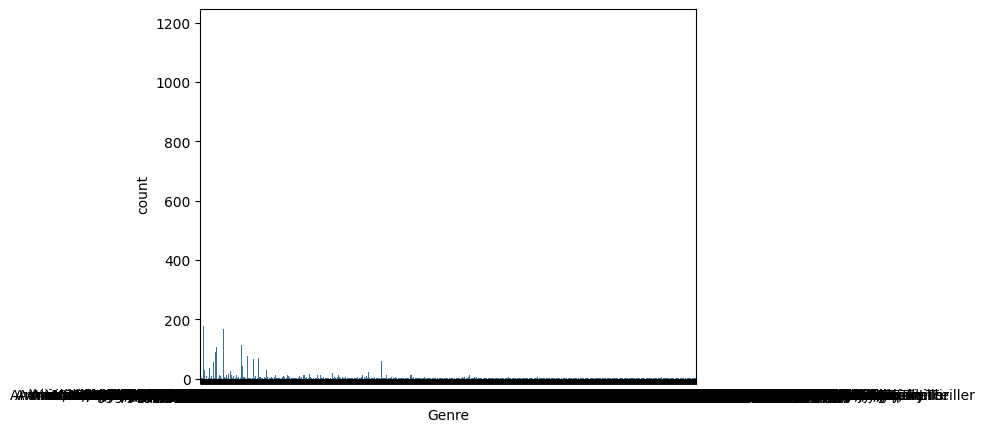

In [ ]:

sns.countplot( x =df["Genre"])

In [ ]:
    df.shape

(15480, 29)

> 📝 Let's take a look at our dataframe so we can open a few things:
> - let's start by observing what [**types of data**](https://realpython.com/python-data-types/) we have inside it with the **.info ()** function;

In [ ]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw





















> - Let's continue our analysis by checking if and how many [**missing values**](https://en.wikipedia.org/wiki/Missing_data) there are;

In [ ]:
df.isnull().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

> - As we can see there are many missing values in the various features so I decide to keep the most important columns in my opinion, even if they have different missing values that we will then remove, and to **drop** other **columns** that I consider superfluous for the analysis also for the large number of missing values they have;

In [ ]:
df = df.drop(columns = [ 'Metacritic Score', 'Boxoffice', 'Production House', 'Netflix Link', 'IMDb Link',
        'Poster', 'TMDb Trailer', 'Trailer Site'], axis = 1)

> - Now since we have 2 features (**'Release Date'** and **'Netflix Release Date'**) indicating a date as object datatype, I 'transform' them into **datetime features** so that we can use them as real dates;

In [ ]:
df['Release Date']= pd.to_datetime(df['Release Date'])
df['Netflix Release Date']= pd.to_datetime(df['Netflix Release Date'])
df['Netflix Release Date'].head()

0   2021-03-04
1   2021-03-04
2   2021-03-04
3   2021-03-04
4   2021-03-04
Name: Netflix Release Date, dtype: datetime64[ns]

> - After this transformation of datatype for these 2 features, I create **2 new features** (one for the released year and one for the released year on Netflix) happy only for the year so as to be able to subsequently emerge an analysis on the productivity of the TV Series and Movie based on the various years;

In [ ]:
df['Released_Year'] = pd.DatetimeIndex(df['Release Date']).year
df['Released_Year_Net'] = pd.DatetimeIndex(df['Netflix Release Date']).year
df['Released_Year_Net'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: Released_Year_Net, dtype: int64

> - Finally, let's take a **look at our dataframe** after the various changes we've made to it.

In [ ]:
df.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,Released_Year,Released_Year_Net
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN,2008.0,2021



55555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555
A **little description** of the features:
> * **Title**: Tells us the name of the movie / series
> * **Genre**: Describes the genre of the movie / series
> * **Tag**: is a list of tags on the movie / series
> * **Language**: Indicates in which language the film / series is available
> * **Series or Movie**: Indicates whether this product is a TV series or a movie
> * **Hidden Gem Score**: This is a score that suggests if this movie / series is a hidden gem (i.e. something that is not mainstream but is a great product and may deserve more attention)
> * **Country Availability**: Please indicate in which country this film / series is available
> * **Runtime**: Indicates the duration of the movie or an episode of the series
> * **Director**: Tells us how is the director of this product
> * **Writer**: Tells us how is the writer of this product,
> * **Actors**: Tells us how are the main actors of this product,
> * **View Rating**: Indicates the rating of the product,
> * **IMDb Score**: This is the score given to the product by IMDb,
> * **Rotten Tomatoes Score**: This is the score given to the product by Rotten Tomatoes,
> * **Awards Received**: It tells us how much awards this film/serie has received ,
> * **Awards Nominated For**: It tells us for which awards this film/movie has been nominated,
> * **Release Date**: It indicates when this product has been released,
> * **Netflix Release Date**: It indicates when this product has been released on Netflix,
> * **Summary**: It tells us a little summary of the plot of the product,
> * **IMDb Votes**: It indicates the scores given by IMDb,
> * **Image**: An Image
> * **Released_Year**: It indicates the year the product was released
> * **Released_Year_Net**: It indicates the year the product was released on Netflix

------------------------

# **2. Easy Data Analysis 🔬🧐**



# 2.1 Movie 📽‍️ vs Tv Series 📺

> 📌 Note:
> The **2 large macro categories** of products that we can find in the Netflix catalog are Movies and TV Series.
> - A **[movie](https://simple.wikipedia.org/wiki/Movie#:~:text=A%20movie%2C%20or%20film%2C%20is%20a%20type%20of,of%20entertainment%20or%20a%20way%20to%20have%20fun.)**, or film, is a type of visual communication which uses moving pictures and sound to tell stories or teach people something. Most people watch (view) movies as a type of entertainment or a way to have fun;
> - A television show is also called a television program (British English: programme), especially if it lacks a narrative structure. A **[television series](https://en.wikipedia.org/wiki/Television_show)** is usually released in episodes that follow a narrative, and are usually divided into seasons (US and Canada) or series (UK) – yearly or semiannual sets of new episodes.

So, knowing the presence of these 2 macro categories, now **let's figure out which of the 2 is more present** in the Netflix product catalog.

`go` is a reference to the plotly.graph_objects module from Plotly, a popular plotting library in Python. Plotly provides an interactive, open-source, and browser-based graphing library for Python. It's well-suited for creating complex, interactive plots with a high degree of customization. The plotly.graph_objects module contains a wide range of graphical objects that can be used to construct complex graphical representations, such as plots, charts, and diagrams.

When you see go.Figure() or go.Bar() in a code snippet, it's utilizing Plotly's graph objects to construct a figure or a bar chart, respectively. These objects are highly customizable and can be combined to create a wide range of visualization types.

go.Figure(): This is used to create a figure object, which serves as a container for plots or charts. You can add various graphical objects (like bar charts, scatter plots, etc.) to this figure.
go.Bar(): This creates a bar chart. You can specify various attributes of the bar chart, such as the x and y data, text labels, and colors.

In [ ]:
# Define a list of colors with two elements, both initially set to 'black'
colors = ['black',] * 2
# Change the first element of the colors list to 'crimson'
colors[0] = 'crimson'

# Calculate the count of unique values in the 'Series or Movie' column of the dataframe 'df'
count = df['Series or Movie'].value_counts()

# Create a new figure object for plotting
fig = go.Figure(data=[go.Bar(
    x = df["Series or Movie"], # Set the x-axis values to the 'Series or Movie' column from the dataframe
    y = count, # Set the y-axis values to the count of each unique value in 'Series or Movie'
    text = count, # Set the bar text to display the count of each category
    textposition='auto', # Automatically position the text on the bars
    marker_color=colors # Set the colors of the bars using the 'colors' list
)])

# Update the text on the bars to show only two significant figures and move it outside the bars
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Update the layout of the figure
fig.update_layout(title_text= 'More Movie 📽‍️ or Tv Series 📺?', # Set the title of the plot
                  uniformtext_minsize=8, uniformtext_mode='hide', # Set the minimum text size and hide overflow text
                  barmode='group', # Group bars of the same x-axis category together
                  xaxis_tickangle=-45, # Rotate the x-axis labels by -45 degrees for better readability
                  yaxis=dict(
                  title='Quantity', # Set the title of the y-axis
                  titlefont_size=14), # Set the font size of the y-axis title
                  xaxis=dict(
                  title='Category', # Set the title of the x-axis
                  titlefont_size=14)) # Set the font size of the x-axis title


> As we can see from this [bar graph](https://plotly.com/python/bar-charts/) there is a big difference between the 2 categories as there are almost 12 thousand TV series against only 3.8 films.

**Division in 2 dataframes 📄 📄**

> - After having ascertained this great difference between the 2 categories, we can **divide our dataframe into 2** so as to be able to work and analyze the TV Series and Movies in a distinct way.

>

In [ ]:
df_movie = df[df['Series or Movie']=='Movie']
df_movie.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,Released_Year,Released_Year_Net
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube,2020.0,2021


In [ ]:
df_series = df[df["Series or Movie"] == "Series"]
df_series.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,Released_Year,Released_Year_Net
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN,2008.0,2021





























--------------

# 2.2 Genres 😍😱😂

> 📌 Note:
> As we all know the world of cinema and TV series is very wide and boundless, this breadth in addition to the myriad of topics to be dealt with is also given by **the multitude of [film genres](https://www.masterclass.com/articles/how-to-identify-film-genres#:~:text=Some%20basic%20movie%20genres%20include%3A%201%20Action%3A%20Movies,pursuing%20an%20outlaw%20in%20the%20Wild%20West.%20)** that have been created over time by following a little also what was happening / happened in the literary field some time before. But **which of these is the most frequent and consequently the most requested by the spectators?** Will it be horror or action movies? Comedy or sentimental films?

Let's find out right away with another bar chart.

**In Tv Series 📺...**









> Code:
> - First of all I create a new series dataframe **dropping the missing values contained in the "Genre" column**.

In [ ]:
df_series_gen = df_series.dropna(subset=['Genre'])

> - Secondly **I create a [list](https://www.w3schools.com/python/python_lists.asp#:~:text=%20Python%20Lists%20%201%20List.%20Lists%20are,Duplicates.%20%205%20List%20Length.%20%20More%20)** that contains all the genres in the column and their quantity. So **I create a new dataframe** with this datas.

In [ ]:


































































'2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222'2# < ⚠ !! This block of code was repeating some categories because of white space or case sensitivity>

# # Define a list of colors to use in visualizations
# colors_10 = ['DarkRed', 'FireBrick', 'Red', 'Crimson', 'IndianRed', 'slategray', 'gray', 'dimgrey', 'DarkSlateGrey', 'black']

# # Split the 'Genre' column of the dataframe into a list of genres for each TV series
# series_gen_list = df_series_gen.Genre.str.split(',')

# # Initialize an empty dictionary to count the occurrences of each genre
# s_gen_list = {}

# # Loop through each list of genres in the series_gen_list
# for genres in series_gen_list:
#     # Loop through each genre in the list of genres
#     for genre in genres:
#         # Check if this genre is already in the s_gen_list dictionary
#         if (genre in s_gen_list):
#             # If the genre exists, increment its count
#             s_gen_list[genre] += 1
#         else:
#             # If the genre does not exist, add it to the dictionary with a count of 1
#             s_gen_list[genre] = 1

# # Convert the s_gen_list dictionary to a DataFrame for easier manipulation
# # Keys of the dictionary become the index, and values become the data in 'Counts of Genres in Tv Series' column
# s_gen_df = pd.DataFrame(s_gen_list.values(), index=s_gen_list.keys(),
#                         columns=['Counts of Genres in Tv Series'])  # Corrected to use a list for columns parameter

# # Sort the DataFrame by 'Counts of Genres in Tv Series' in descending order to get the most common genres first
# s_gen_df.sort_values(by='Counts of Genres in Tv Series', ascending=False, inplace=True)

# # Select the top 10 most common genres from the sorted DataFrame
# top_10_s_gen = s_gen_df[0:10]


SyntaxError: invalid syntax (<ipython-input-15-7a55308c1fcc>, line 1)

### Corrected code after removing white space and letter case differences

In [ ]:
# Drop rows where 'Genre' is NaN to ensure we're working with complete data
df_series_gen = df_series.dropna(subset=['Genre'])

# Split the 'Genre' column of the dataframe into a list of genres for each TV series
series_gen_list = df_series_gen.Genre.str.split(',')

# Initialize an empty dictionary to count the occurrences of each genre
s_gen_list = {}

for genres in series_gen_list:
    for genre in genres:
        # Trim whitespace and convert genre to lowercase for consistency
        genre = genre.strip().lower()
        if genre in s_gen_list:
            s_gen_list[genre] += 1
        else:
            s_gen_list[genre] = 1

# Convert the dictionary to a DataFrame
s_gen_df = pd.DataFrame(list(s_gen_list.values()), index=s_gen_list.keys(),
                        columns=['Counts of Genres in Tv Series'])

# Sort the DataFrame by count in descending order
s_gen_df.sort_values(by='Counts of Genres in Tv Series', ascending=False, inplace=True)

# Select the top 10 most common genres
top_10_s_gen = s_gen_df.head(10)

top_10_s_gen

,Counts of Genres in Tv Series
drama,1400
comedy,1110
animation,877
action,562
romance,561
fantasy,537
adventure,445
crime,436
thriller,425
family,401


> - Thirdly, **I draw a bar chart** to better understand the distribution of the quantities of the various genres contained in the Netflix catalog.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'drama'),
  Text(1, 0, 'comedy'),
  Text(2, 0, 'animation'),
  Text(3, 0, 'action'),
  Text(4, 0, 'romance'),
  Text(5, 0, 'fantasy'),
  Text(6, 0, 'adventure'),
  Text(7, 0, 'crime'),
  Text(8, 0, 'thriller'),
  Text(9, 0, 'family')])

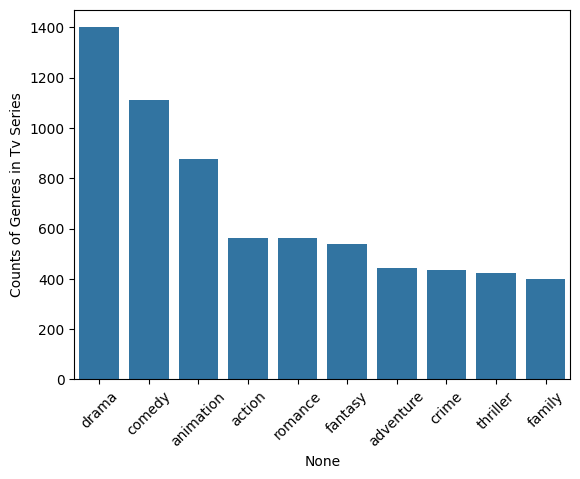

In [ ]:
sns.barplot(x = top_10_s_gen.index,
    y = top_10_s_gen['Counts of Genres in Tv Series'])
plt.xticks(rotation=45)

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_s_gen.index,
    y = top_10_s_gen['Counts of Genres in Tv Series'],
    text = top_10_s_gen['Counts of Genres in Tv Series'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the most popular genres in Tv Series?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Genres',
                  titlefont_size=14))

NameError: name 'colors_10' is not defined

**... We can see that the most present genres, and I think also most requested by viewers, are Drama 😟, Animation 🧚 and Comedies 😂.**

----------------------------

**Meanwhile in the Movie 📽‍️ world ...**

> Code:
> - First of all I create a new series dataframe **dropping the missing values contained in the "Genre" column**.

In [ ]:
df_movie_gen = df_movie.dropna(subset=['Genre'])

> - Secondly **I create a list** that contains all the genres in the column and their quantity. So **I create a new dataframe** with this datas.

In [ ]:

# Split the genre string into lists
movie_gen_list = df_movie_gen.Genre.str.split(', ')

m_gen_list = {}  # Initialize an empty dictionary to hold genre counts

# Loop through each list of genres in the movie_gen_list
for genres in movie_gen_list:
    for genre in genres:  # Loop through each genre in the genres list
        if genre in m_gen_list:  # Check if the genre is already in the dictionary
            m_gen_list[genre] += 1  # Increment the count for this genre
        else:
            m_gen_list[genre] = 1  # Initialize this genre in the dictionary with a count of 1

# Convert the dictionary to a DataFrame
# Note: columns parameter expects a list or a single string, not a set
m_gen_df = pd.DataFrame(list(m_gen_list.values()), index=list(m_gen_list.keys()),
                        columns=['Counts of Genres in Movies'])

# Sort the DataFrame by 'Counts of Genres in Movies' in descending order
m_gen_df.sort_values(by='Counts of Genres in Movies', ascending=False, inplace=True)

# Select the top 10 genres
top_10_m_gen = m_gen_df[0:10]

# Now, top_10_m_gen contains the top 10 genres by count


In [ ]:
top_10_m_gen

,Counts of Genres in Movies
Drama,4959
Comedy,3967
Thriller,2314
Action,2248
Romance,1884
Crime,1496
Adventure,1364
Fantasy,1057
Family,1032
Horror,884


> - Thirdly, **I draw a bar chart** to better understand the distribution of the quantities of the various genres contained in the Netflix catalog.

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_m_gen.index,
    y = top_10_m_gen['Counts of Genres in Movies'],
    text = top_10_m_gen['Counts of Genres in Movies'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the most popular genres in Movies?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Genres',
                  titlefont_size=14))

**... We can see that like with the Tv Series the Genre most rappresented is Drama 😟 followed by Comedy 😂 (that was third in the previous chart) and Thriller🕵🧟.**

-------------

# 2.3 Tags 📝📎

> 📌 Note: As we are used to seeing on social networks, there are also **tags** in other fields. They can be considered as keywords that help to identify a certain thing in a simple and concise way. In our case they recall a little film genres but with slight nuances as maybe a film, or a TV series, can be considered as a set of different genres or in the tags the nationality of production or other small things that help the viewers in their search.

So let's find out, even in this case, which are the most frequent and if there are close links with the quantity of products of the various genres that we have analyzed earlier.

**In the Tv Series 📺...**

> Code:
> - First of all I create a new series dataframe **dropping the missing values contained in the "Tags" column**.

In [ ]:
df_series_tag = df_series.dropna(subset=['Tags'])

> - Secondly, I draw a **Wordcloud** with the most named tags in the list

In [ ]:
# !python -m spacy download en_core_web_sm


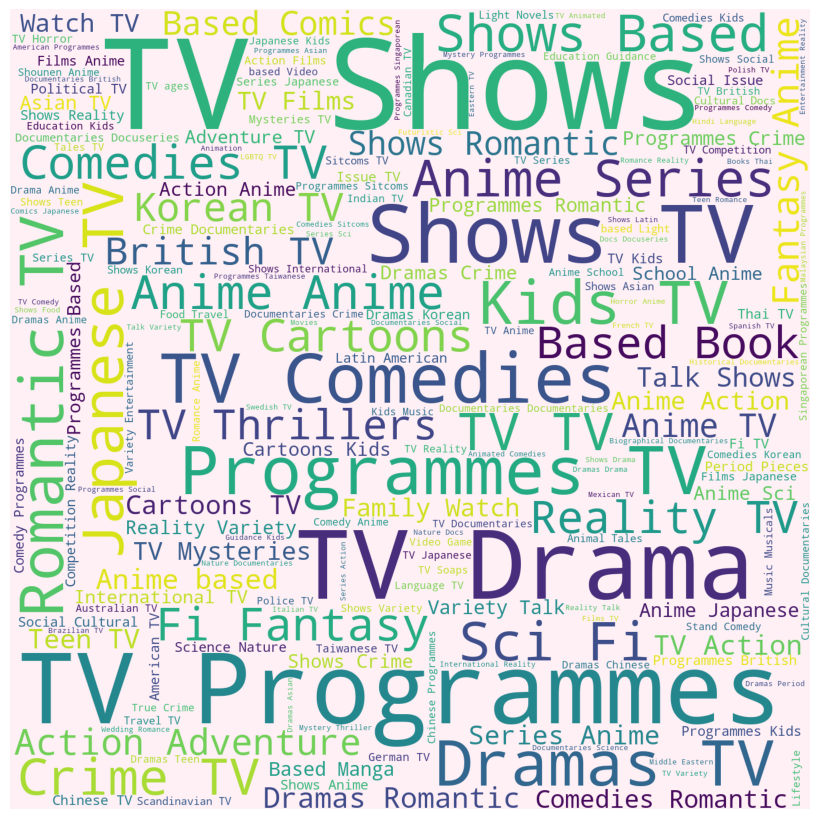

In [ ]:
# Load the English language model for spaCy, used for natural language processing tasks.
nlp = spacy.load('en_core_web_sm')

# Extracts the 'Tags' column from the DataFrame `df_series_tag`, assuming it contains tags related to series or movies.
series_tags = df_series_tag['Tags']

# Initialize an empty list to hold the processed words.
words = []

# Process each tag in the series_tags list with spaCy to perform natural language processing.
for tag in series_tags:
    # Create a Document object by processing the tag string through spaCy's pipeline.
    doc = nlp(tag)
    # Extend the 'words' list with tokens from the processed 'doc' that are not stop words or punctuation.
    # This is done in a list comprehension for efficiency.
    words.extend([token.text for token in doc if not token.is_stop and not token.is_punct])

# Initialize an empty string to concatenate all the processed words into a single string.
rest_string = ' '

# Concatenate each word in the 'words' list into the 'rest_string', separated by spaces.
# This is necessary because the word cloud generator expects a single string input.
for i in words:
   rest_string = rest_string + i + ' '

# Create a WordCloud object with specific dimensions and background color.
# `min_font_size` is set to ensure that the smallest text is legible.
wordcloud = WordCloud(width = 1400, height = 1400,
                background_color ='lavenderblush',
                min_font_size = 5).generate(rest_string)

# Create a plot figure with specified size and no face color.
plt.figure(figsize = (8, 8), facecolor = None)

# Display the generated word cloud image.
plt.imshow(wordcloud)

# Remove the axis for aesthetic purposes, as they're not relevant for a word cloud visualization.
plt.axis("off")

# Apply tight layout with no padding to ensure the word cloud fills the figure.
plt.tight_layout(pad = 0)

# Display the plot.
plt.show()


**While in the Movie 📽‍️ world ..**.

> Code:
> - First of all I create a new series dataframe **dropping the missing values contained in the "Tags" column**.

In [ ]:
df_movie_tag = df_movie.dropna(subset=['Tags'])

> - Secondly, I draw a **Wordcloud** with the most named tags in the list

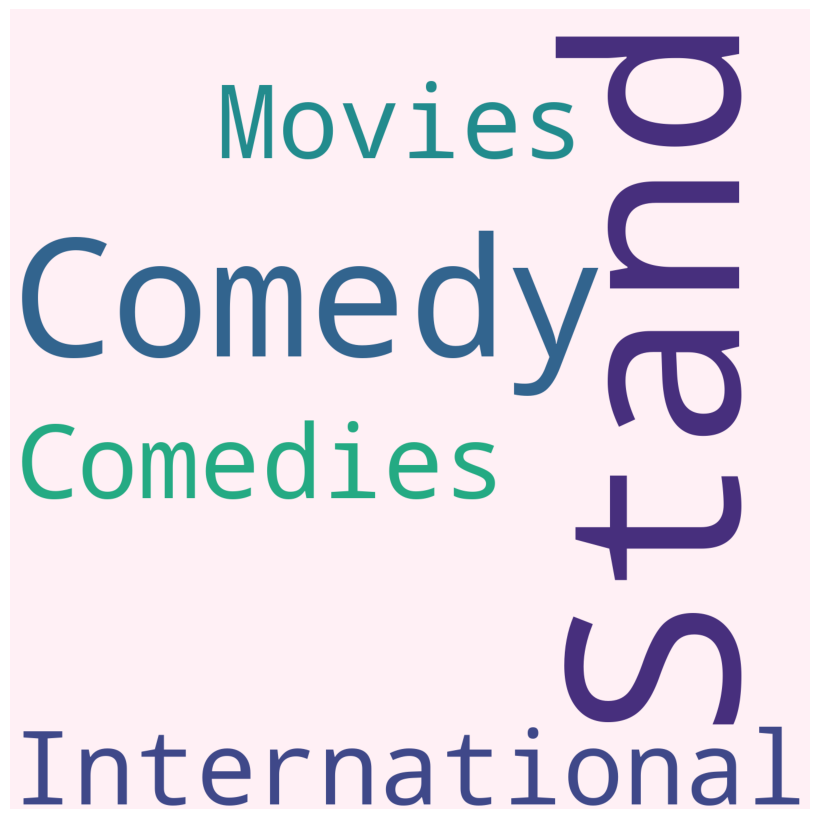

In [ ]:
nlp = spacy.load('en_core_web_sm')
movie_tags = df_movie_tag['Tags']
for tag in movie_tags:
    doc = nlp(tag)
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]
rest_string = ' '
for i in words:
   rest_string = rest_string+i+' '

wordcloud = WordCloud(width = 1400, height = 1400,
                background_color ='lavenderblush',
                min_font_size = 5).generate(rest_string)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

---------------

# 2.4 Languages 🗣🎤

> 📌 Note: There are hundreds of states in the world that rightfully have their own traditions, their own culture and their own languages. This is why there are, According to Ethnologue, **currently [7,117 languages ](https://www.theintrepidguide.com/how-many-languages-are-there-in-the-world/)spoken around the world.**. But what does this have to do with our argument? It really hits the spot because this being the situation, every film shot in a different country will be shot in the original language of that country. Fortunately, nowadays there are voice actors who translate them into various languages so as to give as many people as possible the opportunity to enjoy and watch the various films.

But unfortunately not all films are so famous that they are translated for everyone, so let's go to the discovery of the languages most present in the cinema scene

**In Tv Series 📺...**

> Code:
> - First of all I create a new series dataframe **dropping the missing values contained in the "Languages" column**.

In [ ]:
df_series_lan = df_series.dropna(subset=['Languages'])

> - Secondly plot a treemap that contains squares of different shapes that illustrate the languages spoken in the Tv Series

In [ ]:
ax= px.treemap(df_series_lan,path=["Languages"])
ax.show()

**While in the Movie 📽‍️ universe...**

> Code:
> - First of all I create a new series dataframe **dropping the missing values contained in the "Languages" column**.

In [ ]:
df_movie_lan = df_movie.dropna(subset=['Languages'])

> - Secondly **I create a list** that contains the **top 10 languages** that are spoken in the Tv Series.



In [ ]:
ax= px.treemap(df_movie_lan,path=["Languages"])
ax.show()

-------------------------

# 2.5 Best Hidden Gems 🤠💎

> 📌 Note: Every time you finish watching a very fascinating TV series or movie, you are immediately looking for another similar or equally beautiful one to see. Keep it up for a while, until you run out of all the famous products and then what? How you do it? it is always difficult to understand if a film with few reviews really deserves but luckily for us in this dataset there is a feature called "**Hidden Gem Score**" which indicates a score that indicates **the films with fewer reviews but with very high ratings**.

So let's go immediately to find out which are these hidden gems in our 2 big categories so that if you need a help when you don't know what to choose you can come back from here 😉

> Code:
> - First of all I create a new series dataframe **dropping the missing values contained in the "Hidden Gem Score" column**.
> - Secondly, I have sorted it by discending so the first values have the most high scores
> - Thirdly, I have create a list with the first 10 elements
> - And Finally I have plot the list

**For the Tv Series 📺:**

In [ ]:
df_series_hdg = df_series.dropna(subset=['Hidden Gem Score'])
df_series_hdg = df_series_hdg.sort_values(by = 'Hidden Gem Score', ascending = False)
top_s_10_list = df_series_hdg[:10]
top_s_10_list.reset_index(drop=True, inplace=True)
print('The 10 Best Hidden Gems on Tv Series are:\n',top_s_10_list['Title'])

The 10 Best Hidden Gems on Tv Series are:
 0                 Flavours of Romania
1                 A Lion in the House
2                            Im Sorry
3                    Regiment Diaries
4                        Numberblocks
5                            Stranger
6                        The Lost Art
7                          Doble Kara
8                            Kopitiam
9    Aunty Donnas Big Ol House of Fun
Name: Title, dtype: object


**For the movie 📽‍️:**

In [ ]:
df_movie_hdg = df_movie.dropna(subset=['Hidden Gem Score'])
df_movie_hdg = df_movie_hdg.sort_values(by = 'Hidden Gem Score', ascending = False)
top_m_10_list = df_movie_hdg[:10]
top_m_10_list.reset_index(drop=True, inplace=True)
print('The 10 Best Hidden Gems in Movies are:\n',top_m_10_list['Title'])

The 10 Best Hidden Gems in Movies are:
 0                             No Festival
1                         The Dream House
2                           Horsin Around
3                              Conspiracy
4                              Green Gold
5                                One Girl
6                        The Last Animals
7                         The Consuls Son
8                          Bye Bye London
9    Invisible Essence: The Little Prince
Name: Title, dtype: object


--------------------

# 2.6 Countries 🌍 🗺

> 📌 Note: As we said with regard to languages, it also applies to countries as there are **[195](https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/) countries around the world**. But how many of them have the opportunity to produce products such as films or TV series? Which are the most productive? And which countries have the most movies or TV series available on Netflix?

Let's go to discover it

**In the Series Universe 📺...**

> Code:

> - First of all I create a new series dataframe **dropping the missing values contained in the "Country Availability" column**.

In [ ]:
df_series_ctr = df_series.dropna(subset=['Country Availability'])

> - Secondly **I create a list** that contains all the genres in the column and their quantity. So **I create a new dataframe** with this datas.

In [ ]:
series_ctr_list = df_series_ctr['Country Availability'].str.split(', ') # Split the string into a list of country names.

s_ctr_list = {} # Initialize an empty dictionary to store country counts.

# Iterate over the list of country lists.
for countries in series_ctr_list:
    for country in countries: # For each country in each list.
        if country in s_ctr_list: # Check if the country is already in the dictionary.
            s_ctr_list[country] += 1 # Increment the count for this country.
        else:
            s_ctr_list[country] = 1 # Add the country to the dictionary with a count of 1.

# Convert the dictionary to a DataFrame. Use a list for column names to avoid the ValueError.
s_ctr_df = pd.DataFrame(list(s_ctr_list.values()), index=list(s_ctr_list.keys()), columns=['Counts of Country Availability'])

# Sort the DataFrame by 'Counts of Country Availability' in descending order (for ascending order, set ascending=True).
s_ctr_df.sort_values(by='Counts of Country Availability', ascending=False, inplace=True)

# Select the top 10 countries by count.
top_10_s_ctr = s_ctr_df[0:10]


> - Thirdly, **I draw a bar chart** to better understand which countries have a larger availability about the Netflix Series.

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_s_ctr.index,
    y = top_10_s_ctr['Counts of Country Availability'],
    text = top_10_s_ctr['Counts of Country Availability'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which countries have a larger Series Availability?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Countries',
                  titlefont_size=14))

**And in the Movie world 📽‍️**

> Code:

> - First of all I create a new series dataframe **dropping the missing values contained in the "Country Availability" column**.

In [ ]:
df_movie_ctr = df_movie.dropna(subset=['Country Availability'])

> - Secondly **I create a list** that contains all the genres in the column and their quantity. So **I create a new dataframe** with this datas.

In [ ]:
# Split the 'Country Availability' column into a list of country names
movie_ctr_list = df_movie_ctr['Country Availability'].str.split(', ')

# Create an empty dictionary to hold the count of movies available in each country
m_ctr_list = {}

# Iterate through each list of countries for a movie
for countries in movie_ctr_list:
    for country in countries: # Iterate through each country in the list
        if country in m_ctr_list: # Check if the country is already in the dictionary
            m_ctr_list[country] += 1 # Increment the count for this country
        else:
            m_ctr_list[country] = 1 # Add the country to the dictionary with a count of 1

# Convert the dictionary into a DataFrame for easier manipulation
# The keys become the index, and the values are assigned to a column named 'Counts of Country Availability'
m_ctr_df = pd.DataFrame(list(m_ctr_list.values()), index=list(m_ctr_list.keys()),
                        columns=['Counts of Country Availability'])

# Sort the DataFrame in descending order based on the counts
m_ctr_df.sort_values(by='Counts of Country Availability', ascending=False, inplace=True)

# Select the top 10 countries with the highest counts of movie availability
top_10_m_ctr = m_ctr_df[:10]


> - Thirdly, **I draw a bar chart** to better understand which countries have a larger availability about the Netflix Movies.

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_m_ctr.index,
    y = top_10_m_ctr['Counts of Country Availability'],
    text = top_10_m_ctr['Counts of Country Availability'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which countries have a larger Movie Availability?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Countries',
                  titlefont_size=14))

-----------

# 2.7 Duration  ⏲⏳

> 📌 Note: Nowadays we are so busy during the day that you have to try to fit everything together if you want to do all the things to do. This also applies to extras such as seeing a movie or a TV series. However, they have a substantial difference that the film is one and therefore normally lasts an hour or more while the TV series that are episodic, which therefore they can be seen a little at a time or all in one go, they are easier as the average episodes last about 30/40 minutes. What do you prefer? Are you from #TeamMovie📽‍️ or #TeamSerie📺 ?

But let's find out what this dataframe teaches us about the duration of the various TV series or films

**In the Series 📺 world ...**

> Code:

> - First of all I create a new series dataframe **dropping the missing values contained in the "Runtime" column** and then I counts the values with the function [.value_counts()](https://medium.com/swlh/python-data-analysis-value-counts-115c7ad4ffec#:~:text=General%20usage.%20The%20value_counts%20%28%29%20function%20can%20be,or%20descending%20order%20%2C%20use%20sort%20as%20argument.).

In [ ]:
df_series_drt = df_series.dropna(subset=['Runtime'])
df_series_drt['Runtime'].value_counts()

Runtime
< 30 minutes    3782
Name: count, dtype: int64

**... we can see this dataframe telling us that Netflix series episodes are always 30 minutes or less.**

**Meanwhile in the Movie 📽‍️ universe ...**

> Code:

> - First of all I create a new series dataframe **dropping the missing values contained in the "Runtime" column**.

In [ ]:
df_movie_drt = df_movie.dropna(subset=['Runtime'])

> - Secondly, **I draw a bar chart** to better understand what is the average duration of the Movies.

In [ ]:
count_d = df_movie_drt['Runtime'].value_counts()
fig = go.Figure(data=[go.Bar(
    x = count_d.index,
    y = count_d,
    text = count_d,
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'What is the average duration of a movie on Netflix?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Duration',
                  titlefont_size=14))

... As we can see the great majority of the movies are **1-2 hour**

---------------------------

# 2.8 Directors 🎬 and actors 🤵

> 📌 Note: Obviously, behind the creation of a film or a TV series there are many people who also work in the rearguards, but let's say that those who put their face on it and influence the success of the product in the foreground are the actors and the director. What is the role that fascinates you the most? Are you from #TeamDirector or #TeamActor?

So let's analyze and observe which are the most frequent directors and actors in the Netflix catalog

**2.8.1 Directors** 🎬

- **In Series 📺**

In [ ]:
df_series_dir = df_series.dropna(subset=['Director'])

In [ ]:
series_dir_list = df_series_dir['Director'].str.split(', ')  # split the list into names
s_dir_list = {}  # create an empty dictionary

for directors in series_dir_list:  # for any directors in series_dir_list
    for director in directors:  # for each director in directors
        if director in s_dir_list:  # if this director is already present in the s_dir_list
            s_dir_list[director] += 1  # increase his value
        else:  # else
            s_dir_list[director] = 1  # Create his index in the dictionary

s_dir_df = pd.DataFrame(s_dir_list.values(), index=s_dir_list.keys(),
                        columns=['Director Counts'])  # Create a s_dir_df
s_dir_df.sort_values(by='Director Counts', ascending=False, inplace=True)  # Sort the dataframe in descending order
top_10_s_dir = s_dir_df[0:10]


In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_s_dir.index,
    y = top_10_s_dir['Director Counts'],
    text = top_10_s_dir['Director Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the directors that have directed more Tv Series?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of Tv Series he/she directed',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Directors',
                  titlefont_size=14))

As we can see the directors that have directed more Series Tv are **George Lucas**, **Hideki Takeuchi** and **Arcie Baron**.

- **In the Movies** 📽‍️

In [ ]:
df_movie_dir = df_movie.dropna(subset=['Director'])

In [ ]:
movie_dir_list = df_movie_dir['Director'].str.split(', ') #split the list into names
m_dir_list = {} #create an empty list
for directors in movie_dir_list: # for any countries in series_ctr_list
    for director in directors: # for any country in countries
        if (director in m_dir_list): #if this country is already present in the s_ctr_list
            m_dir_list[director]+=1 # increase his value
        else:  # else
            m_dir_list[director]=1 # Create his index in the list
m_dir_df = pd.DataFrame(m_dir_list.values(),index = m_dir_list.keys(),
                        columns = ['Director Counts']) #Create a s_ctr_df
m_dir_df.sort_values(by = 'Director Counts',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_m_dir = m_dir_df[0:10]

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_m_dir.index,
    y = top_10_m_dir['Director Counts'],
    text = top_10_m_dir['Director Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the directors that have directed more Movies?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of Movies he/she directed',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Directors',
                  titlefont_size=14))

As we can see the directors that have directed more Movies are **Steven Spielberg**, **Johnnie To** and **Jing Wong**.

**2.8.2 Actors**

- **In Series planet**

In [ ]:
df_series_act = df_series.dropna(subset=['Actors'])

In [ ]:
series_act_list = df_series_act['Actors'].str.split(', ') #split the list into names
s_act_list = {} #create an empty list
for actors in series_act_list: # for any countries in series_ctr_list
    for actor in actors: # for any country in countries
        if (actor in s_act_list): #if this country is already present in the s_ctr_list
            s_act_list[actor]+=1 # increase his value
        else:  # else
            s_act_list[actor]=1 # Create his index in the list
s_act_df = pd.DataFrame(s_act_list.values(),index = s_act_list.keys(),
                        columns = ['Actor Counts']) #Create a s_ctr_df
s_act_df.sort_values(by = 'Actor Counts',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_s_act = s_act_df[0:10]

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_s_act.index,
    y = top_10_s_act['Actor Counts'],
    text = top_10_s_act['Actor Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the actors that have played more Tv Series?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of Tv Series he/she played',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Actors',
                  titlefont_size=14))

As we can see the actors that have played more Series are **Johnny Yong Bosch**, **Kana Hanazawa** and **Ai Kayano**.

- **Meanwhile in the Movies world**

In [ ]:
df_movie_act = df_movie.dropna(subset=['Actors'])

In [ ]:
movie_act_list = df_movie_act['Actors'].str.split(', ') #split the list into names
m_act_list = {} #create an empty list
for actors in movie_act_list: # for any countries in series_ctr_list
    for actor in actors: # for any country in countries
        if (actor in m_act_list): #if this country is already present in the s_ctr_list
            m_act_list[actor]+=1 # increase his value
        else:  # else
            m_act_list[actor]=1 # Create his index in the list
m_act_df = pd.DataFrame(m_act_list.values(),index = m_act_list.keys(),
                        columns = ['Actor Counts']) #Create a s_ctr_df
m_act_df.sort_values(by = 'Actor Counts',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_m_act = m_act_df[0:10]

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_m_act.index,
    y = top_10_m_act['Actor Counts'],
    text = top_10_m_act['Actor Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the actors that have played more Movies?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of Movies he/she played',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Actors',
                  titlefont_size=14))

As we can see the actors that have played more Movies are **Bruce Willis**, **Jackie Chan** and **Nicolas Cage**.

# 2.9 Tv Series 📺 and Movie 📽‍️ Charts by Rotten Tomatoes and IMBd

> 📌 Note: We are not human if we do not judge things, it is in our nature. As happens in all things, even in the film world there are those who give votes, for this reason we are going to analyze 2 of the major websites where you can find reliable reviews and votes that could help us, or advise us, in the search for a Film / TV series to see:
> * **Rotten Tomatoes** is an American review-aggregation website for film and television. The company was launched in August 1998 by three undergraduate students at the University of California, Berkeley: Senh Duong, Patrick Y. Lee, and Stephen Wang. Although the name "Rotten Tomatoes" connects to the practice of audiences throwing rotten tomatoes when disapproving of a poor stage performance, the original inspiration comes from a scene featuring tomatoes in the Canadian film Léolo (1992).
> * **IMDb (an acronym for Internet Movie Database)** is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.  Originally a fan-operated website, the database is now owned and operated by IMDb.com, Inc., a subsidiary of Amazon.

**2.9.1 Tv Series 📺 Charts**

- **IMDb**

In [ ]:
df_series_imdb = df_series.dropna(subset=['IMDb Score'])
df_series_imdb = df_series_imdb.sort_values(by = 'IMDb Score', ascending = False)
top_s_imdb_10_list = df_series_imdb[:10]

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_s_imdb_10_list['Title'],
    y = top_s_imdb_10_list['IMDb Score'],
    text = top_s_imdb_10_list['IMDb Score'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the most rated Tv Series for IMDb?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='IMDb Score',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

- **Rotten Tomatoes**

In [ ]:
df_series_rt = df_series.dropna(subset=['Rotten Tomatoes Score'])
df_series_rt = df_series_rt.sort_values(by = 'Rotten Tomatoes Score', ascending = False)
top_s_rt_10_list = df_series_rt[:10]

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_s_rt_10_list['Title'],
    y = top_s_rt_10_list['Rotten Tomatoes Score'],
    text = top_s_rt_10_list['Rotten Tomatoes Score'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the most rated Tv Series for Rotten Tomatoes?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Rotten Tomatoes Score',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

As we can see, **the rankings of the top 10 for the series are completely different**, so before choosing a movie to watch it is best to take a look at both sites so that you can have a comparison and have a wider view

**2.9.2 Movie 📽‍️ Charts**

- **IMDb**

In [ ]:
df_movie_imdb = df_movie.dropna(subset=['IMDb Score'])
df_movie_imdb = df_movie_imdb.sort_values(by = 'IMDb Score', ascending = False)
top_m_imdb_10_list = df_movie_imdb[:10]

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_m_imdb_10_list['Title'],
    y = top_m_imdb_10_list['IMDb Score'],
    text = top_m_imdb_10_list['IMDb Score'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the most rated Movies for IMDb?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='IMDb Score',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

- **Rotten Tomatoes**

In [ ]:
df_movie_rt = df_movie.dropna(subset=['Rotten Tomatoes Score'])
df_movie_rt = df_movie_rt.sort_values(by = 'Rotten Tomatoes Score', ascending = False)
top_m_rt_10_list = df_movie_rt[:10]

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_m_rt_10_list['Title'],
    y = top_m_rt_10_list['Rotten Tomatoes Score'],
    text = top_m_rt_10_list['Rotten Tomatoes Score'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the most rated Movies for Rotten Tomatoes?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Rotten Tomatoes Score',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

As we had seen for the Series, even in the world of films **the rankings of the top 10 are very different** and therefore it is better to look at both sites to have a comparison and a better view on the product

# 2.10 Top 15 Tv Series and Movie for awards received  🏆 🥇

> Obviously, in addition to the votes, there are also prizes up for grabs in the film world and among the most famous are the Golden Globes, the Hollywood Film Awards and the Oscars.

So let's go see which are the most awarded films and series

- **In the Tv Series  📺 Universe**

In [ ]:
df_series_awr = df_series.dropna(subset=['Awards Received'])
df_series_awr = df_series_awr.sort_values(by = 'Awards Received', ascending = False)
top_s_awr_15_list = df_series_awr[:15]

In [ ]:
colors_15 = ['DarkRed', 'FireBrick', 'FireBrick' ,'Red', 'Crimson', 'Crimson', 'IndianRed' , 'slategray', 'slategray' , 'gray' , 'gray', 'dimgrey', 'dimgrey', 'DarkSlateGrey', 'black']
fig = go.Figure(data=[go.Bar(
    x = top_s_awr_15_list['Title'],
    y = top_s_awr_15_list['Awards Received'],
    text = top_s_awr_15_list['Awards Received'],
    textposition='auto',
    marker_color=colors_15 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the 15 TV series 📺 that have received the most awards?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Awards Received',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

- **While in the movie 📽‍️ catalog**

In [ ]:
df_movie_awr = df_movie.dropna(subset=['Awards Received'])
df_movie_awr = df_movie_awr.sort_values(by = 'Awards Received', ascending = False)
top_m_awr_15_list = df_movie_awr[:15]

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_m_awr_15_list['Title'],
    y = top_m_awr_15_list['Awards Received'],
    text = top_m_awr_15_list['Awards Received'],
    textposition='auto',
    marker_color=colors_15 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Which are the 15 Movies 📽‍️ that have received the most awards?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Awards Received',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

# 2.11 Productivity per year (on Netflix) 📆

> And finally, as a last topic, let's analyze which was the year in which the most series were released and which was the most films released. What do you think they were?

- **2.11.1 Tv Series 📺**

In [ ]:
df_series_rel = df_series.dropna(subset=['Released_Year_Net'])

In [ ]:
series_rel_list = df_series_act['Released_Year_Net']
s_rel_list = {} #create an empty list
for year in series_rel_list: # for any year in series_rel_list
    if (year in s_rel_list): #if this year is already present in the s_rel_list
        s_rel_list[year]+=1 # increase his value
    else:  # else
        s_rel_list[year]=1 # Create his index in the list
s_rel_df = pd.DataFrame(s_rel_list.values(),index = s_rel_list.keys(),
                        columns = ['Year Counts']) #Create a s_ctr_df
s_rel_df.sort_values(by = 'Year Counts',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_s_rel = s_rel_df[0:10]

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_s_rel.index,
    y = top_10_s_rel['Year Counts'],
    text = top_10_s_rel['Year Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'In which year there have been more Tv Series released ?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of release',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

- Movie 📽‍️

In [ ]:
df_movie_rel = df_movie.dropna(subset=['Released_Year_Net'])

In [ ]:
movie_rel_list = df_movie_act['Released_Year_Net']
m_rel_list = {} #create an empty list
for year in movie_rel_list: # for any year in movie_rel_list
    if (year in m_rel_list): #if this year is already present in the m_rel_list
        m_rel_list[year]+=1 # increase his value
    else:  # else
        m_rel_list[year]=1 # Create his index in the list
m_rel_df = pd.DataFrame(m_rel_list.values(),index = m_rel_list.keys(),
                        columns = ['Year Counts']) #Create a s_ctr_df
m_rel_df.sort_values(by = 'Year Counts',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_m_rel = m_rel_df[0:10]

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_m_rel.index,
    y = top_10_m_rel['Year Counts'],
    text = top_10_m_rel['Year Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'In which year there have been more Movies released ?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of release',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))